# Introduction To Scikit-Learn (sklearn)
* This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.
## What we're going to cover:
0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

# 0. An end-to-end Scikit-Learn workflow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Create X (Features matrix)
X = heart_disease.drop("target",axis=1)

# Create y (labels)
y = heart_disease["target"]

In [4]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier # this is a classification (ML) Model
# it is able to learn patterns from the data and classifying if a sample is one thing or the other
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params() # this allows us to see what hyperparamteres is our model is using


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split # allows us to split our data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
# this will allows us to split our data from X and y into (X_train,y_train) and (X_test,y_test)
# the split is 80% is for training data and 20% is for test data
# so basically 80% will be assigned from (X) to (X_train) and 20% to (X_test)
# same goes for (y), data 80% will be assigned to (y_train) and 20% to (y_test) 


In [6]:
clf.fit(X_train,y_train);
# we are basically telling the classification model(RandomForestClassifier)
# find patterns in our training data

In [7]:
# our model is train on X_train 
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2


# make a prediction
# Y_label = clf.predict(np.array([0,2,3,4]))
# this will give error
# As this array does not look like the one our model is trained on

In [8]:
y_preds = clf.predict(X_test) # X_test is the right structure that our model is trained on
y_preds

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [9]:
y_test

214    0
251    0
115    1
266    0
156    1
      ..
113    1
84     1
192    0
235    0
87     1
Name: target, Length: 61, dtype: int64

In [10]:
# 4. Evaluate the model on the training data and test data
# how well our model has done in finding the patterns
clf.score(X_train, y_train)
# 1.0 is maximum score
# As you can see our model has done 100% on our training data

1.0

In [11]:
clf.score(X_test,y_test)

0.9016393442622951

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        27
           1       0.94      0.88      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [13]:
confusion_matrix(y_test, y_preds)

array([[25,  2],
       [ 4, 30]], dtype=int64)

In [14]:
accuracy_score(y_test, y_preds)

0.9016393442622951

# Above were more steps to evaluate our model

In [15]:
# 5. Imporve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 85.25%

Trying model with 20 estimators...
Model accuracy on test set: 86.89%

Trying model with 30 estimators...
Model accuracy on test set: 85.25%

Trying model with 40 estimators...
Model accuracy on test set: 88.52%

Trying model with 50 estimators...
Model accuracy on test set: 91.80%

Trying model with 60 estimators...
Model accuracy on test set: 90.16%

Trying model with 70 estimators...
Model accuracy on test set: 90.16%

Trying model with 80 estimators...
Model accuracy on test set: 90.16%

Trying model with 90 estimators...
Model accuracy on test set: 91.80%



# There are quite a few n_estimaters for which model performs 88.2%
# so we choose the first one n_estimaters = 40

In [16]:
# 6. Save a model and load it
import pickle
pickle.dump(clf, open("random_forest_model_1.pkl","wb"))

In [17]:
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(X_test, y_test)

0.9180327868852459

# our model was trained on the last value of (i) in the loop, which is 100

# 1. Getting our data ready to be used with machine learning

## Three main things we have to do:
    1. Split the data into features and labels (usually 'X' & 'y')
    2. Filling (also calle dimputing) or disregarding missing values
    3. Converting non-numerical values to numerical values  (also called feature encoding)

In [18]:
X = heart_disease.drop("target",axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [20]:
# now we split the data between training and test set
# cause never test your model on the data which it has learned from
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2) # this function returns four different values
# in the same order as the name of the variables suggest


In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

# that number 13 tells us that our training data have 13 features
# and 242 tells us that due to test_size the 80% data given to X_test is 242 samples

In [22]:
X.shape

(303, 13)

In [23]:
X.shape[0] * 0.8

242.4

In [24]:
car_sales = pd.read_csv("car-sales-extended.csv")

In [25]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [26]:
len(car_sales)

1000

In [27]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

# we are going to try and train a model to predict Price column

In [28]:
# Split data into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Splie data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


In [29]:
# BUild machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# model.fit(X_train,y_train)
# model.score(X_test, y_test)
# this will give error because our data have non-numerical column

In [30]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make", "Colour", "Doors"]
# why doors?
# isn't it numerical
# well becuase even though it is numerical it also categorical
# hence needs to be dealt with 
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder = "passthrough")
# above line basically applies OneHotEncoder on all columns mentioned in Categorical_features
# and rest of the column which are not mentioned just "passthrough"
transformed_X = transformer.fit_transform(X)
# in above line the instructions which were given in previous line are applied to the actually Date (X)
# Resulting in transforming our non-numerical and categorical data into categories
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [31]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


# OneHotEncoder does is 
# it converts for example colors of the cars into columns and 
# if car is red then it assigns it 1 else 0 same for the rest of the color columns
# not only that but it also converted the cars columns into different make columns
# for example a column for honda, a column for toyota and so on so forth
# so basically for each sample if car is honda and has red color then for that sample 
# honda and red columns will have 1 correspondingly

In [32]:
# one more ways to the above same
dummies = pd.get_dummies(car_sales[["Make","Colour", "Doors"]],dtype=int)
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


# As "Doors" Column was already in numbers so it didn't do anything with it

In [33]:
# Let's Refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,y, test_size = 0.2)
model.fit(X_train,y_train)

RandomForestRegressor()

In [34]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?
1. Fill them with some value (also known as imputation).
2. Remove the Samples with missing data altogether.

In [35]:
# Import car sales missing data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [36]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [37]:
# Create X & y
X = car_sales_missing.drop("Price", axis=1 )
y = car_sales_missing["Price"]

In [38]:
# Let's try and convert our data to number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder = "passthrough")
transformed_X = transformer.fit_transform(X)

# Although this version of sklearn is now able to work with missing data
# but it still a better practice to deal with missing data
# let's do that then

### Option 1: Fill missing data with Pandas

In [39]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing",inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing",inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

# Fill the "Doors" column
# As Doors column have higher 4 count so we will fill it with 4
car_sales_missing["Doors"].fillna(4,inplace=True)

C:\Users\Faizan\AppData\Local\Temp\ipykernel_8492\3699059275.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Make"].fillna("missing",inplace=True)
C:\Users\Faizan\AppData\Local\Temp\ipykernel_8492\3699059275.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [40]:
# Check our DataFrame again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [41]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)
# As only "Price" column is left with NaN values
# so above statment will remove the rows having missing "Price" values


In [42]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [43]:
len(car_sales_missing)

950

# Now we redo our steps

In [44]:
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [45]:
# Let's try and convert our data to number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder = "passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X 

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

## Option 2: Fill missing values with Scikit-Learn

In [46]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [47]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [48]:
car_sales_missing.dropna(subset=["Price"], inplace=True) # basically remove all NaN rows of Price
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [49]:
# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [50]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [51]:
# Fill missing values with Scikit_learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Fill categorical value with 'missing' & numrical values with mean
cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")
# these SimpleImputer functions are baiscally tells what to fill in place of missing values
# if the values is constant eg. "missing" or 4 you have to define the strategy as constant
# if not constant then define the startegy eg. "mean"

# Define columns
cat_features = ["Make","Colour"] # define non-numerical column
door_feature = ["Doors"] # define categorical-numerical column
num_features = ["Odometer (KM)"] # define numerical column

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([("cat_imputer", cat_imputer, cat_features),
                            ("door_imputer", door_imputer,door_feature),
                            ("num_imputer", num_imputer, num_features)])
# the above function takes a list
# in the list three tuples 
# in each tupel there is a name (use this to call the same imputer for future needs)
# the method/imputer 
# the feature_list on which you want to apply that imputer/method

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X


array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [52]:
car_sales_filled = pd.DataFrame(filled_X,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [53]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [54]:
# Let's try and convert our data to number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder = "passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X 

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [55]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model= RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.21990196728583944

In [56]:
len(car_sales_filled), len(car_sales)

(950, 1000)

# Process of turning your non-numerical values into numberical values is called "Feature Encoding"
# or "Feature Engineering"
# Process of filling in the missing values is called "Feautre Imputing"

## 2. Choosing the right estimator/algorthm for your problem
Some things to note:
* Sklearn refers to machine learning models, algorithms as estimators.
* Classification problem - prediciting a category (heart disease or not)
   * sometimes your'll see 'clf' (short for classifier) used as a classification estimator
* Regression problem - predicting a number (selling price of car) 

<img src="sklearn-ml-map-cheatsheet-boston-housing-ensemble.png"/>

### 2.1 Picking a machine learning model for a regression problem
Let's use the california Housing dataset - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [57]:
# Get California housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [58]:
# converting the dictionary dataset into DataFrame
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [59]:
# adding the target column in our DataFrame
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [60]:
# Import algorithm
from sklearn.linear_model import Ridge

# setup random seed
np.random.seed(42)

# create teh data
X = housing_df.drop("target",axis=1)
y = housing_df["target"] # median house price in $100,000

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train,y_train)
model.score(X_test,y_test)
# model.score() be default uses cofficient of determination
# it basically evualtes the linear relationship between our features and the target variable
# and how much is able to predict our target variable given the necessary features

0.5758549611440125

In [61]:
# Import algorithm
from sklearn import linear_model

# setup random seed
np.random.seed(42)

# create teh data
X = housing_df.drop("target",axis=1)
y = housing_df["target"] # median house price in $100,000

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
# Instantiate and fit the model (on the training set)
model = linear_model.LassoLars(alpha=.1)
model.fit(X_train,y_train)
model.score(X_test,y_test)
# model.score() be default uses cofficient of determination
# it basically evualtes the linear relationship between our features and the target variable
# and how much is able to predict our target variable given the necessary features

0.531893183165832

What if 'Ridge' didn't work or the score didn't fit our needs?


How about we try an ensemble model (an ensemble is combination of smaller modelsto try and make better predictions than just a single model)

Sklearn'sensemble models acan be found here: https://scikit-learn.org/1.3/modules/ensemble.html

# Ensemble Method basically uses multiple models to improve its prediction capability

## Decision Trees are basically nodes which follows a path of yes/no condition
## RandomForestRegression makes use of N number of decision trees to predict
## n_estimators is basically the number of decision trees
## be default n_estimator is set to 100

In [62]:
# Import the RnadomForestRegression model class fromt he ensemble module
from sklearn.ensemble import RandomForestRegressor

#Setup random seed
np.random.seed(42)

# Creaet the data
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

# Create random forest model
model = RandomForestRegressor()
model.fit(X_train,y_train)

# Check the score of the model (on the test set)
model.score(X_test,y_test)

0.8065734772187598

## 2.2 Picking a machine learning model for a classification problem

In [63]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Consulting the map and it says to try `LinearSVC`

In [64]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Steup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target",axis=1)
y= heart_disease["target"]

# Split our data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# instantiate LinearSVC
clf = LinearSVC(dual=True,max_iter=10000)
clf.fit(X_train,y_train)

#Evaluate the LInearSVC
clf.score(X_test,y_test)

C:\Users\Faizan\Desktop\sample_project_1\env\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [65]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [66]:
# Import the LinearSVC estimator class
from sklearn.ensemble import RandomForestClassifier

# Steup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target",axis=1)
y= heart_disease["target"]

# Split our data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# instantiate RandomForestClassifies
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

#Evaluate the LInearSVC
clf.score(X_test,y_test)

0.8524590163934426

# Tidbit:

1. If you have structered data always go for ensemble method
2. If you have unstructered data use deeplearning or transfer learning

## 3. Fit the model/algorithm on our data nd use it to make prediction

### 3.1 Fitting the model to the data

Different names for:
* `X` = features, features variables, data
* `y` = labels, targets, target variables

In [67]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Steup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target",axis=1)
y= heart_disease["target"]

# Split our data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# instantiate RandomForestClassifies
clf = RandomForestClassifier()

# Fit the model to the data
clf.fit(X_train,y_train)
# this is here we train our model
# it basically looks at the pattern in each of sample's features and try to match the label(target)

#Evaluate the RandomForestClassifies
clf.score(X_test,y_test)

0.8524590163934426

# 3.2 make predictions using a machine learning model

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

# Use a trained model to make predictions
# pass on the exact form of data that your model is trained on
# clf.predict(np.array([1,7,83,4])) 
# This doesn't work because our model is trained on 2d.array

In [68]:
X_test


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [69]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [70]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [71]:
# COmpare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [72]:
clf.score(X_test,y_test)

0.8524590163934426

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

Make predictions with `predict_proba()`

In [74]:
# Make predictions with predict_proba(); returns probabilities of a classification label
clf.predict_proba(X_test[:5]) # [first_element:does not have(0) , second_element:have heart_disease(1)]
# number both of the elements represent is probability of having a heart_disease or not
# it does for first five samples in the X_test list

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [75]:
# Let's predict() on the same data
clf.predict(X_test[:5]) # this just gives out the output as 1=heart_disease and 0=No heart_disease
# so basically predicting the labels

array([0, 1, 1, 0, 1], dtype=int64)

In [76]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


# predicta_proba allows us to see that for which sample, our model is unsure of making the right prediction
# basically, having close probabilities of both (just like coin toss)

`predict()` can also be used for regression models

In [77]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [78]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Create model instance
model = RandomForestRegressor()

#Fit the model to the data
model.fit(X_train, y_train)

# make predictions
y_preds = model.predict(X_test)

In [79]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [80]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [81]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds) # basically takes the difference b/w preds and test values 
# and takes average of the difference


0.32659871732073664

In [82]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator's built-in `score()` method
2. THe `scoring` parameter
3. Problem-specific metric functions

You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the `score` method

In [83]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [84]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Create train/test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier()

# Fit the Classifier to training data
clf.fit(X_train,y_train)


RandomForestClassifier()

In [85]:
# The highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_train,y_train) # this is the exact data our model has learned on
# so it is no surprise that it got 1.0 score 

1.0

In [86]:
clf.score(X_test,y_test)

0.8524590163934426

Let's use the `score()` on our regression problem...

In [87]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [88]:
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Make the data
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Instantiate RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)

# Fit the model to the data
model.fit(X_train, y_train)

RandomForestRegressor()

In [89]:
# the default score() evaluation metric is r_squared for regression algorithms
# Highest = 1.0, lowest = 0.0
# if our model perfectly predicts then we get the highest score
# if our model predicts the mean of the y_test values then we get the lowest score
model.score(X_test,y_test)

0.8065734772187598

In [90]:
y_test.mean()

2.0550030959302323

# 4.2 Evaluationg a model using the `scoring` parameter

In [91]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Create train/test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier()

# Fit the Classifier to training data
clf.fit(X_train,y_train);

In [92]:
clf.score(X_test,y_test)

0.8524590163934426

In [93]:
cross_val_score(clf,X,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

<img src="sklearn-cross-validation.png"/>

# `cross_val_score(clf,X,y,cv=10)` function basically check the score on 5 different subsets of data
# By default it is 5 through `cv=5` parameter you can change it

# this helps us to futher evaluate our model
# as our model some times gets train on that split of data that might result in good score
# whereas if the split was different the score would have been different
# so basically we could see far better how much better our model is doing for truer general data

In [94]:
cross_val_score(clf,X,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [95]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test,y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf,X,y,cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [96]:
# Default scoring parameter of classifier = mean accuracy
# clf.score()

In [97]:
# scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report
* Accuracy

In [98]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score(clf,X,y,cv=5)


array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [100]:
np.mean(cross_val_score(clf,X,y,cv=5))

0.8018032786885245

In [101]:
print(f"Heart Disease Classifier Accuracy: {np.mean(cross_val_score(clf,X,y,cv=5))*100:.2f}%")

Heart Disease Classifier Accuracy: 81.17%


**Area under the curve and Receiver operating characteristic curve (AUC/ROC)**
* Area under curve(AUC)
* ROC curve

ROC curves are a comparision of a model's true positive rate (tpr) versus a models false postive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* Ture negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [102]:
# Create X-test.. etc
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [103]:
from sklearn.metrics import roc_curve

# fit the classifier
clf.fit(X_train,y_train)

# Make predictions with probabilites
y_proba = clf.predict_proba(X_test)

y_proba[:10]

array([[0.04, 0.96],
       [0.65, 0.35],
       [0.17, 0.83],
       [0.99, 0.01],
       [0.19, 0.81],
       [0.16, 0.84],
       [0.51, 0.49],
       [0.92, 0.08],
       [0.44, 0.56],
       [0.25, 0.75]])

In [104]:
# extracting the probabilites of getting 1
y_probs_positive = y_proba[:,1]

In [105]:
y_probs_positive[:10]

array([0.96, 0.35, 0.83, 0.01, 0.81, 0.84, 0.49, 0.08, 0.56, 0.75])

In [106]:
# Caclulate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

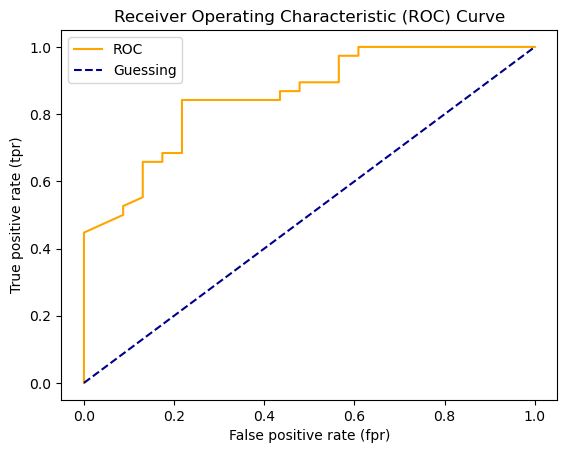

In [107]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # plot roc curve
    plt.plot(fpr, tpr, color='orange', label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color='darkblue',linestyle="--", label="Guessing")

    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

# The yellow line represent the curve generated by plot (FPR, TPR)
# Our model is performing good if our Y-value=TPR is greater
# it will result in more larger/wider curve 
# having larger Area Under the curve (AUC)
# larger the AUC the better our model's performance
# meaning our curve is reaching TPR value of 1.0 very quickly
### So basically, when FPR was 0.0, meaning the samples with a true value of zero were not falsely predicted as ones by our model. At the same instance, our TPR was 0.4, meaning our model correctly predicted 40% of the ones against the samples with a true value of one.

In [108]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.8552631578947368

# the maximum score of AUC you will get would be 1.0

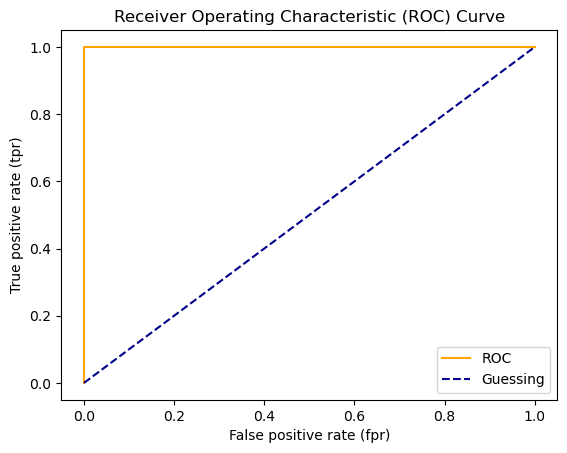

In [109]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

In [110]:
# Perfect AUC score
roc_auc_score(y_test,y_test)

1.0

# ***Confusion Matrix***

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused

In [111]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[18,  5],
       [ 7, 31]], dtype=int64)

In [112]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,y_preds,rownames=["Actual Label"],colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,18,5
1,7,31


# This basically True positive, false pastive ..etc like diagram

# True negative

### our model has correctly predicted '0' value for '18' samples for which also the true value was '0'

# False negative

### our model has incorrectly predicted '0' value for '7' samples for which the true value was '1'

# True positive

### our model has correctly predicted '1' value for 31 samples for which also the true value was '1'

# False positive

### oru model has incorrectly predicted '1' value for 5 samples for which the true value was '0'

<img src="sklearn-confusion-matrix-anatomy.png"/>

In [113]:
# How to install a conda package into the current environment from a Jupyter Notebook

In [114]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



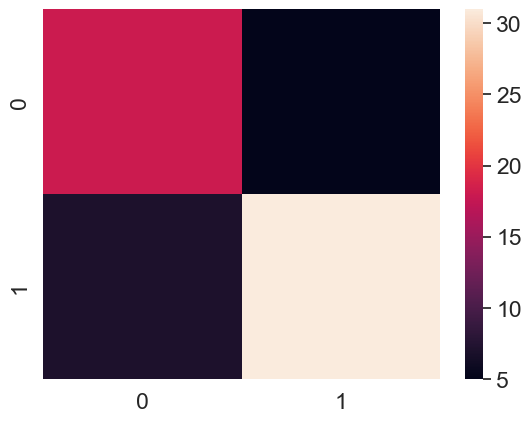

In [115]:
# make our confusion matrix more visual Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

### Creating a confusion matrix using Scikit-Learn

To use the new methods of creating ta confusion matrix with Scikit-Learn you will need sklearn version 1.0+
https://scikit-learn.org/stable/install.html

In [116]:
import sklearn
sklearn.__version__

'1.4.2'

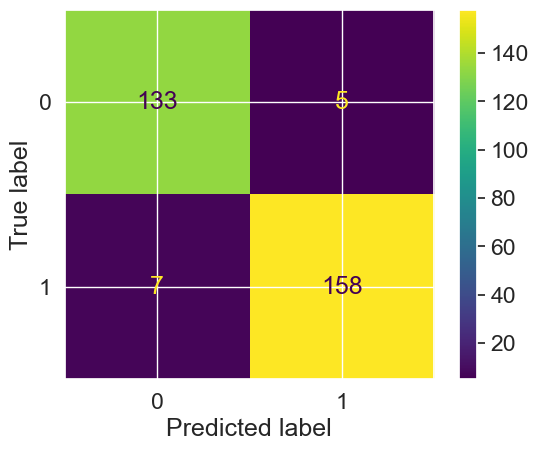

In [117]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y)

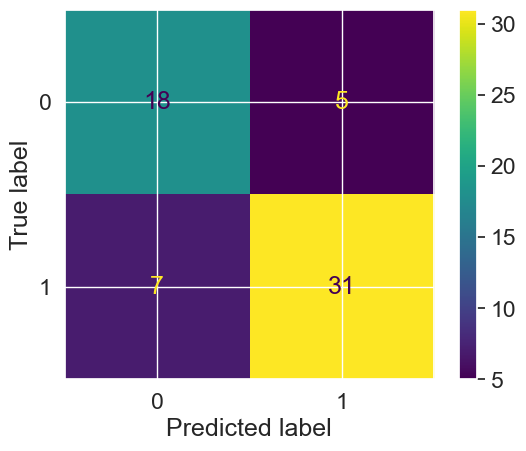

In [118]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds)

# Classification Report

In [119]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75        23
           1       0.86      0.82      0.84        38

    accuracy                           0.80        61
   macro avg       0.79      0.80      0.79        61
weighted avg       0.81      0.80      0.80        61



<img src="sklrean-claasification-report-anatomy.jpg"/>

In [120]:
# Where precision and recall beocome valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

C:\Users\Faizan\Desktop\sample_project_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Faizan\Desktop\sample_project_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Faizan\Desktop\sample_project_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


# due to class imbalance, where there is only one sample have value 1 out of 10000
# although our accuracy is 99.9% but looking at other metrics 
# it clears our understanding that our model wasn't able to predict the other class which is '1'
# our macro avg has also done poorlly

# 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

the ones we're going to cover are:
1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error(MSE)

In [121]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target",axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train,y_train)


RandomForestRegressor()

In [122]:
model.score(X_test,y_test)

0.8065734772187598

In [123]:
from sklearn.metrics import r2_score

# Fill an array with y_test_mean
y_test_mean = np.full(len(y_test),y_test.mean()) # it creates an array of the same size as of y_test
# then fill every element with the value of y_test.mean()

In [124]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [125]:
r2_score(y_true=y_test,y_pred=y_test_mean)

0.0

# as our model has done so poorly that it is predicting only the mean of the true ground values of our sampel data
# the r2_score would be 0.0

In [126]:
r2_score(y_true=y_test,y_pred=y_test)

1.0

# if our model has correctly predicted all the values for each sample 
# then the score would be 1.0 (highest)

# Mean absolute error (MAE)

MAE is the average of the absolute differences between preditctions and actual values

It gives you an idea of how wrong your models predicts are 

In [127]:
# MAE
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)
mae

0.32659871732073664

**The above value means that each one of our predictions is +- 0.326 of our actually true ground vaules**

In [128]:
df = pd.DataFrame(data = {"actuall values": y_test,"predicted values":y_preds})
df["differences"] = df["predicted values"] - df["actuall values"]
df.head(10)

,actuall values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [129]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.32659871732073664

In [130]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

# **Mean squared error (MSE)**
MSE is the mean of the square of the errors between actual and predicted values

In [131]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=y_test,y_pred=y_preds)

0.2534678520824551

In [132]:
df["squared difference"] = df["differences"]**2

In [133]:
df

,actuall values,predicted values,differences,squared difference
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [134]:
df["squared difference"].mean()

0.2534678520824551

In [135]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared difference"] = 16
df_large_error

C:\Users\Faizan\AppData\Local\Temp\ipykernel_8492\519571801.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_large_error.iloc[0]["squared difference"] = 16


,actuall values,predicted values,differences,squared difference
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [136]:
# Calculate MSE with large error
df_large_error["squared difference"].mean()

0.2573437523766412

**didn't do much**

In [137]:
df_large_error.iloc[1:100]=20
df_large_error

,actuall values,predicted values,differences,squared difference
20046,0.47700,0.493840,0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [138]:
# Calculate MSE with large error
df_large_error["squared difference"].mean()

0.7334180712088106

# if there was an outlier MSE results confirms that there is an outlier having difference larger than rest

<img src="which_regression_metric_should_you_use.jpg"/>

# **4.2.3 Finally using the `scoring` parameter**

In [139]:
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()



In [140]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc= cross_val_score(clf,X,y,cv=5, scoring=None) # if scoring=None estimator's default scoring evalutaion metric is used (accuracy for classificatoin models)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [141]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [142]:
np.random.seed(42)

cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [143]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [144]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [145]:
# Cross-validated precision
print(f"The cross-validated precision is: {np.mean(cv_precision)}")

The cross-validated precision is: 0.8329547346025924


In [146]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [147]:
# Cross-validated recall
print(f"The cross-validated recall is: {np.mean(cv_recall)}")

The cross-validated recall is: 0.8545454545454545


# **Let's see the `scoring` parameter for regression model**

In [148]:
from sklearn.ensemble import RandomForestRegressor

X = housing_df.drop("target",axis=1)
y = housing_df["target"]

model = RandomForestRegressor()

In [149]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3,scoring=None)# the default scoring method for regressor model is (coffescient of determination)
np.mean(cv_r2)

0.6545458023124507

In [150]:
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [151]:
# Mean absolute error
np.random.seed(42)

cv_mae = cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4835773816036823

In [152]:
cv_mae

array([-0.51754565, -0.42678172, -0.50640477])

In [153]:
# Mean squared error
np.random.seed(42)

cv_mse = cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.46141356443710196

In [154]:
cv_mse

array([-0.51017222, -0.33368897, -0.5403795 ])

### The greater the value the better our model is performing
### why because we our using neg instead simple mean_squared_error
### in simple mean squared error/absolute error 
### the lower the value the better our model performs

## 4.3 Using different evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to use the `sklearn.metrics` module = https://scikit-learn.org/stable/modules/model_evaluation.html

In [155]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


1.  Precision: Measures how many of the predicted positive samples are actually positive. It's crucial when the cost of false positives is high (e.g., spam detection). for example if in our target sample there were 50 1's and 50 0's. if our model has predicted 40 1's and all of them are actually correct. That means our precision is high. But remember there some 1's are incorrectly identified as 0's that's where Recall comes in.

2. Recall: Measures how many of the actual positive samples are correctly identified. It's essential when the cost of false negatives is high (e.g., medical diagnoses). basically it checks of our model has correctly predicted all the true ground positives correctly or not

3. in short Precision: for the 1's you have predicted they should be correct regardless of the amount of correctly predicted 1's are lower then the number of 1's present in the target sample
4. in short Recall: you must correctly identify all the 1's in our target sample. the number of correct 1's must equal to the number of 1's in the target sample

In [156]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Create X & y
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train,y_train)
y_preds = clf.predict(X_test)

# Evaluate model using evaluation funcions
# 1. basically just returns no. of correct y_preds/no. of sample
# 2. basically uses this formula tp/(tp+fp) true-pos(tp) & false-pos(fp)
    # by default score for only positive class is returned
# 3. basically uses this formula tp/(tp+fn) true-pos(tp) & false-neg(fn)
    # by default score for only positive class is returned
# 4. basically to balance precision and recall, f1_score() uses harmanoic mean of both 

print(f"Accuracy: {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test,y_preds)}")
print(f"Recall: {recall_score(y_test,y_preds)}")
print(f"F1: {f1_score(y_test,y_preds)}")

Accuracy: 85.25%
Precision: 0.8888888888888888
Recall: 0.8648648648648649
F1: 0.8767123287671232


In [157]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Create data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Fit model
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)
# Evaluate the mode using evaluation function
# 1. basically r2_score checks how close to true ground values and farther from the mean of true ground values is our model predicting
# 2. basically MAE tells the average difference between the predicted value and actual value
# 3. Mean Squared Error (MSE) and Mean Absolute Error (MAE) both measure prediction errors, but MSE places more emphasis on larger errors due to squaring
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test,y_preds)}")
print(f"MAE : {mean_absolute_error(y_test,y_preds)}")
print(f"MSE : {mean_squared_error(y_test,y_preds)}")

Regression metrics on the test set
R2 score: 0.8108802646401766
MAE : 0.3225672615552327
MSE : 0.25309650721947646


# lower MAE and MSE the better our model's performance

## 5. Imporving a model

First predictions = baseline predictions.

first model = baseline model.

From a data perspective:
* Could we collect more data? (generally, the more dat, the better)
* Could we improve our data? (more information about each sample)

From a model perspective
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs. Parameter
* Parameter = model find these patterns in the data
* HyperParameter = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [158]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()


In [159]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### These are hyper-parameters 
### You can adjust them for your model so that it can perform better

## **5.1 Tuning Hyperparameters by hand**

Let's make 3 sets, training, validation, and test

In [160]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**We're going to try and adjust:**
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [161]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparision on y_true labels vs. y_preds labels on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy,2) ,"precision": round(precision,2) , "recall": round(recall,2) , "round(f1": round(f1,2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"recall: {recall:.2f}")
    print(f"f1: {f1:.2f}")

    return metric_dict

In [162]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into trian, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70%
valid_split = round(train_split+ 0.15*len(heart_disease_shuffled)) # 15%
X_train, y_train = X[:train_split],y[:train_split]
X_valid, y_valid = X[train_split:valid_split],y[train_split:valid_split]
X_test, y_test = X[valid_split:],y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metric = evaluate_preds(y_valid,y_preds)
baseline_metric

Acc: 82.22%
Precision: 0.81
recall: 0.88
f1: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'round(f1': 0.85}

# as we are using sklearn greatere than 0.22 so n_estimator is by default is 100

In [163]:
np.random.seed(42)
clf_3 = RandomForestClassifier(max_depth = 10)
clf_3.fit(X_train,y_train)

y_preds_3 = clf_3.predict(X_valid)

clf_3_metric = evaluate_preds(y_valid,y_preds_3)
clf_3_metric

Acc: 80.00%
Precision: 0.81
recall: 0.84
f1: 0.82


{'accuracy': 0.8, 'precision': 0.81, 'recall': 0.84, 'round(f1': 0.82}

# manually doing this is tedious

# **5.2 Hyperparameter tuning with RandomizedSearchCV**

In [164]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators":[10,100,200,500,1000,1200],
        "max_depth":[None,5,10,20,30],
        "max_features":["auto","sqrt"],
        "min_samples_split":[2,4,6],
        "min_samples_leaf":[1,2,4]}
np.random.seed(42)

# Split X & y
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate the model
clf = RandomForestClassifier(n_jobs=1) 
# n_jobs allows you to customelly set the amount of your processor you want to assign to your machine learning model

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10,# number of models to try (basically from 'grid' randomly selecting the parameters 10 times)
                           cv=5,
                           verbose=2)
# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train,y_train)
# for each combination of parameters our model will be trained on 5 different split of data


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

C:\Users\Faizan\Desktop\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Faizan\Desktop\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Faizan\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Faizan\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    val

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

# **The "auto" parameters in the "max_features" doesn't work now**

In [165]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
                       "max_depth": [None, 5, 10, 20, 30],
                       "max_features": ["sqrt", "log2", None],
                       "min_samples_split": [2, 4, 6],
                       "min_samples_leaf": [1, 2, 4]}
# through different values of above parameters our model will find the best parameter

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set n_jobs to -1 to use all available cores on your machine (if this causes errors, try n_jobs=1)
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV 
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, 
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

# Fit the RandomizedSearchCV version of clf (does cross-validation for us, so no need to use a validation set)
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.0s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.1s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.2s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.7s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.8s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=6, n_est

In [166]:
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 30}

# now by default "rs_clf" will run on these best parameters that it found it


In [167]:
# Make predictions with the best hyperprarameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_y_preds)

Acc: 83.61%
Precision: 0.78
recall: 0.89
f1: 0.83


# although everything got slightly better except our precision we can try to increase the number of n_iter

# **5.3 Hyperparamter tuning with GridSearchCV**
* it will go through every single combination of prameter that is present in `grid`
* so this function does not have the `n_iter` parameter 

In [168]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [169]:
6*5*2*3*3*5

2700

In [170]:
grid_2 = {
     'n_estimators': [ 500, 1000, 1200],
     'max_depth': [ 20, 30],
     'max_features': ['sqrt', 'log2', None],
     'min_samples_split': [ 6],
     'min_samples_leaf': [ 2, 4]
}
# by looking our best parameters we have reduced our hyper parameters to reduce computation

In [171]:
3*2*3*1*2*5

180

In [172]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set n_jobs to -1 to use all available cores on your machine (if this causes errors, try n_jobs=1)
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV 
gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2, 
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

# Fit the GridSearchCV version of clf (does cross-validation for us, so no need to use a validation set)
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=

In [173]:
gs_clf.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 500}

In [174]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test,gs_y_preds)

Acc: 81.97%
Precision: 0.77
recall: 0.86
f1: 0.81


## Let's compare our different models metrics.

<Axes: >

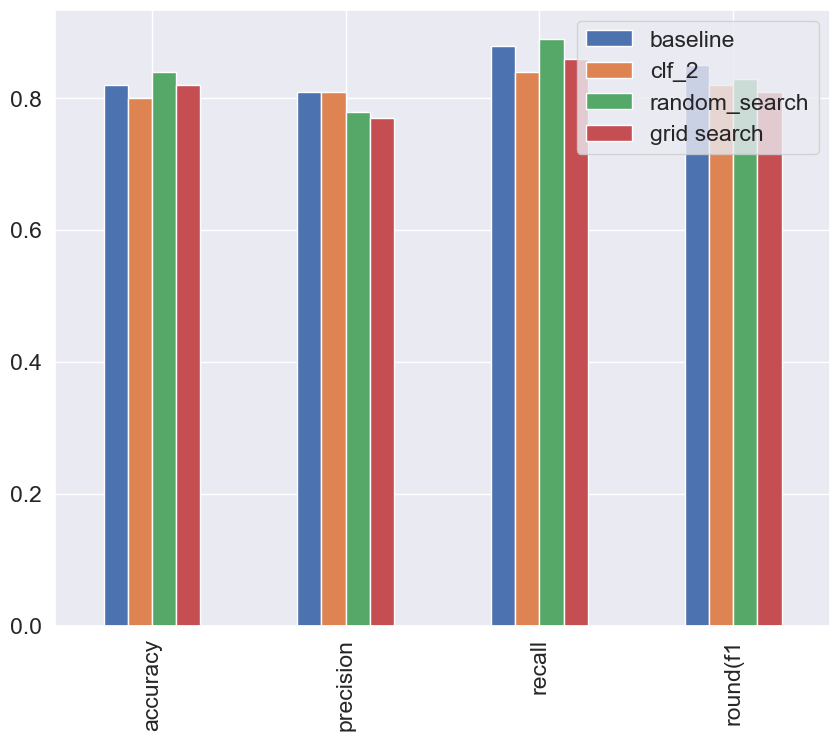

In [175]:
compare_metrics = pd.DataFrame({"baseline": baseline_metric,
                                "clf_2": clf_3_metric,
                                "random_search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10,8))

# Correlation Anaylsis
* when two or more columns have the same effect on the target value.
* Then it is ok to remove one of the columns as you know when the value of one column is increased the value of other is also high and also the value of target also gets high
* so removing the extra column doesn't effect our model that much

# Forward/Backward Attribute Selection
* After building the model it would be wise to check if reducing the number of features effect our model or not
* Reducing features is called `Backward Attribute Selection`
* Whereas increasing the atttributes is known as `Forward Attribute Selection`

### These are also the ways to test our model and reduce our data if want to

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` module
2. with the `joblib` module

**Pickle**

In [176]:
import pickle

# save as existing module to file
pickle.dump(gs_clf,open("gs_random_random_forest_model_1.pkl","wb"))

In [177]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_random_forest_model_1.pkl","rb"))

In [178]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test,pickle_y_preds)

Acc: 81.97%
Precision: 0.77
recall: 0.86
f1: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'round(f1': 0.81}

# Joblib

In [179]:
from joblib import dump,load

# Save model to file
dump(gs_clf,filename="gs_random_model_1.joblib")

['gs_random_model_1.joblib']

In [180]:
# Import a saved joblib model

loaded_job_model = load(filename= "gs_random_model_1.joblib")

In [181]:
# make and evaluate joblib predictions
joblib_y_preds = loaded_job_model.predict(X_test)
evaluate_preds(y_test,joblib_y_preds)

Acc: 81.97%
Precision: 0.77
recall: 0.86
f1: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'round(f1': 0.81}

# if your model is large enough then use joblib for exporting your model

# **7. Putting it all together!**

In [182]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [183]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [184]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

#  Setps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [196]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import dat and drop rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data = data.dropna(subset="Price")

# Define different features and transformer pipeline
categorical_features = ["Make","Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant", fill_value="missing")),
    ("onhot", OneHotEncoder(handle_unknown="ignore"))
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing stesp (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat",categorical_transformer,categorical_features),
                        ("door",door_transformer,door_feature),
                        ("num",numeric_transformer,numeric_features)
                    ]
)

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",RandomForestRegressor())
])

# Split data
X = data.drop("Price",axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.22188417408787875

# basically when you called model.fit()
# it went to model = Pipeline()
# which then want to preprocessor = ColumnTransformer()
# which then exectued 
* categorical_transformer = Pipeline()
* door_transformer = Pipeline()
* numeric_transformer = Pipeline()
# performing steps to first fill the values with "missing" in the columns mentioned in `categorical_features` list
# then it fill convert the same features into numbers with `OneHotEncoder()`
# Then it fill the missing values in the `Door` column with the value `4`
# Then it fill the missing values in the `Odometer (KM)` column with the `mean` value


# **It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`.**

# **in the pipe_Grid**
* the keys represent the path to follow to apply the different parameters
* for example in `preprocessor__num__imputer__strategy`
* we are telling from preprocessor which is this `preprocessor = ColumnTransformer()`
* go to `("num",numeric_transformer,numeric_features)` the `numeric_tranformer` its alias is `num`
* which is this `numeric_transformer = Pipeline()`
* in it go to this `"imputer", SimpleImputer(strategy="mean")` and try both `mean` and `median` strategy

In [197]:
# Using grid search with pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"], # note the double underscore after each prefix "preprocessor__"
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onhot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [198]:
gs_model.score(X_test,y_test)

0.2848784564026805